# Washington Homes for Sale

Washington Homes for Sale es una empresa inmobiliaria que comercializa viviendas en Washington State, USA. La empresa cuenta con una base de datos que contiene los precios de venta de las viviendas vendidas en los últimos años en Washington, así como información acerca de estas casas y apartamentos como el número de cuartos, número de metros cuadrados, condición de la vivienda, entre otros. Usted ha sido contratado por la empresa para desarrollar un sistema de aprendizaje automático que permita predecir el precio de venta de una vivienda, a partir de los datos de esta vivienda. Dicho sistema le permitirá a la empresa tener un estimado del precio al cual se puede poner en venta cada vivienda, además, cuando un cliente propone vender su vivienda en cierta cantidad, la empresa podrá saber si este monto está por encima o por debajo del precio del mercado, y podrá orientar al cliente en este sentido.

Se cuenta con la siguiente información de cada vivienda:

|     Campo     |                                                                                                             Descripción                                                                                                            |
|:-------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       id      | ID único para cada vivienda vendida                                                                                                                                                                                                |
|      date     | Fecha de la venta de la casa                                                                                                                                                                                                       |
|     price     | Precio de cada vivienda vendida                                                                                                                                                                                                    |
|    bedrooms   | Número de dormitorios                                                                                                                                                                                                              |
|   bathrooms   | Número de baños, donde 0,5 representa una habitación con aseo pero sin ducha                                                                                                                                                       |
|  sqft_living  | Metros cuadrados del espacio interior de la vivienda                                                                                                                                                                               |
|    sqft_lot   | Metros cuadrados del espacio del terreno                                                                                                                                                                                           |
|     floors    | Número de plantas                                                                                                                                                                                                                  |
|   waterfront  | Variable dummy para si el apartamento tenía vista al mar o no                                                                                                                                                                      |
|      view     | Un índice de 0 a 4 de lo buena que era la vista de la propiedad                                                                                                                                                                    |
|   condition   | Un índice de 1 a 5 sobre la condición del apartamento                                                                                                                                                                              |
|     grade     | Un índice de 1 a 13, en el que de 1 a 3 se queda corto en cuanto a la construcción y el diseño del edificio, 7 tiene un nivel medio de construcción y diseño, y de 11 a 13 tiene un nivel de alta calidad de construcción y diseño |
|   sqft_above  | Los metros cuadrados del espacio interior de la vivienda que están por encima del nivel del suelo                                                                                                                                  |
| sqft_basement | Los metros cuadrados del espacio interior de la vivienda que están por debajo del nivel del suelo                                                                                                                                  |
|    yr_built   | Año de construcción de la vivienda                                                                                                                                                                                                 |
|  yr_renovated | El año de la última remodelación de la vivienda                                                                                                                                                                                    |
|    zipcode    | En qué zona del código postal se encuentra la casa                                                                                                                                                                                 |
|      lat      | Latitud                                                                                                                                                                                                                            |
|      long     | Longitud                                                                                                                                                                                                                           |
| sqft_living15 | Los metros cuadrados de espacio habitable de la vivienda para los 15 vecinos más cercanos                                                                                                                                          |
|   sqft_lot15  | Los metros cuadrados de las parcelas de los 15 vecinos más cercanos                                                                                                                                                                |

[descargar dataset](https://drive.google.com/uc?export=download&id=1AKTS-Z-1WN0Wrn-s5cyCXk2ccgQTkJTz)

## Configuración 

Se importan los módulos necesarios además de validar que ciertas versiones sean iguales o superiores a las declaradas. Se debe usar python ≥ 3.7 y Scikit-Learn ≥0.20.

In [2]:
# Verificar la versión de Python
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 es requerido
import sklearn
assert sklearn.__version__ >= "0.20"

# Eliminar los Warnings
import warnings
warnings.filterwarnings('ignore')

# Importaciones comunes
import pandas as pd
import numpy as np
import seaborn as sns
import os

# Matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# configurar los directorios de trabajo
# Obtener ruta absoluta

PROJECT_ROOT_PATH = os.path.abspath('.')
DATASET_URL = 'https://drive.google.com/uc?export=download&id=1AKTS-Z-1WN0Wrn-s5cyCXk2ccgQTkJTz'
EXERCISE_FOLDER_NAME = 'whashingtown_homes_for_sale'
IMAGES_PATH = os.path.join(
    PROJECT_ROOT_PATH,
    EXERCISE_FOLDER_NAME,
    'images'
)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Obtención del dataset

Se descarga el dataset con el propósito de realizar el análisis de datos.

In [4]:
# Cargar los datos
df = pd.read_csv(DATASET_URL)
#mostrar los primeros 5 registros
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# mostrar los últimos 5 registros
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# mostrar la información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Listar los nombres de las columnas
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# Cantidad de registros
df.shape

(21613, 21)

Se puede apreciar que el dataset cuenta con 21 columnas, y que el dataset tiene un total de 21613 registros.

In [9]:
# Verificar si hay valores nulos
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No hay valores nulos, por lo cual no hay que rellenar los datos faltantes con algún metodo como el método de la media.

In [10]:
# Representar mejor el porcentaje de valores nulos
f"El Porcentaje valores nulos es {(df.isnull().sum().sum() / len(df))  * 100} %"

'El Porcentaje valores nulos es 0.0 %'

In [11]:
# describir los datos
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
# Verificar si hay casas repetidas
df.duplicated().sum()

0

## Preprocesamiento
El precio de venta (valor a estimar) de las viviendas se encuentra en la columna price. El precio de una casa puede depender por diversos factores, es por ello que se debe preprocesar el dataset con el proposito de solo tener datos relevantes para el análisis.

In [13]:
# El Id de la casa no afecta la predicción, es por ello que se elimina del dataset
df.drop(['id'], axis=1, inplace=True)

In [14]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
# convertir `date` a fecha
df.date = pd.to_datetime(df.date)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Análisis de las distribuciones de los datos

Por cada uno de los datos, se realiza un análisis gráfico con el fin de verificar que los datos se encuentren en una distribución normal. Primero se evalua la cantidad de datos por valor de cada columna y luego el valor frente al precio de venta.

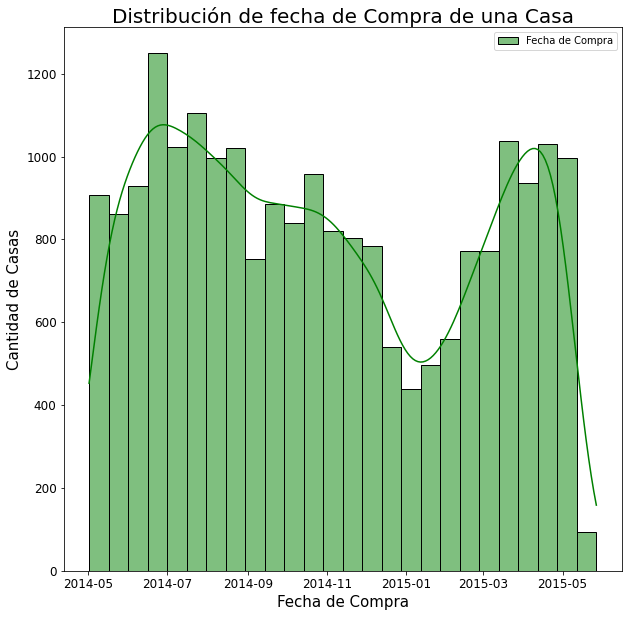

In [16]:
fig= plt.figure(figsize=(10,10))
plt.title('Distribución de fecha de Compra de una Casa', ha='center', va='center', size=20)
sns.histplot(x='date',data=df, color="green", label="Fecha de Compra", kde= True)
plt.xlabel('Fecha de Compra', size=15)
plt.ylabel('Cantidad de Casas', size=15)
plt.legend()


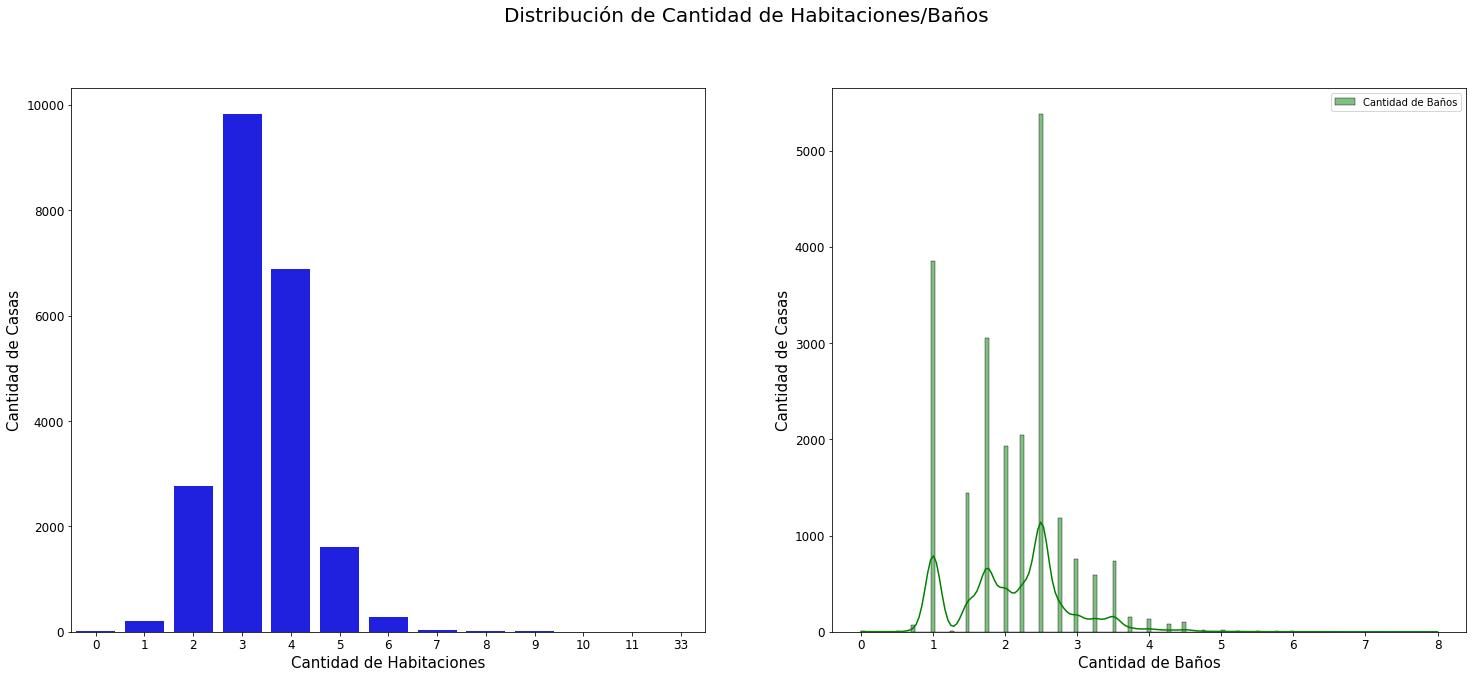

In [17]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
plt.suptitle('Distribución de Cantidad de Habitaciones/Baños', ha='center', va='center', size=20)
sns.countplot(x='bedrooms', data=df, ax=ax[0], color="blue", label="Cantidad de Habitaciones")
ax[0].set_xlabel('Cantidad de Habitaciones', size=15)
ax[0].set_ylabel('Cantidad de Casas', size=15)
sns.histplot(df['bathrooms'], ax=ax[1], color="green", label="Cantidad de Baños",kde= True)
ax[1].set_xlabel('Cantidad de Baños', size=15)
ax[1].set_ylabel('Cantidad de Casas', size=15)
plt.legend()

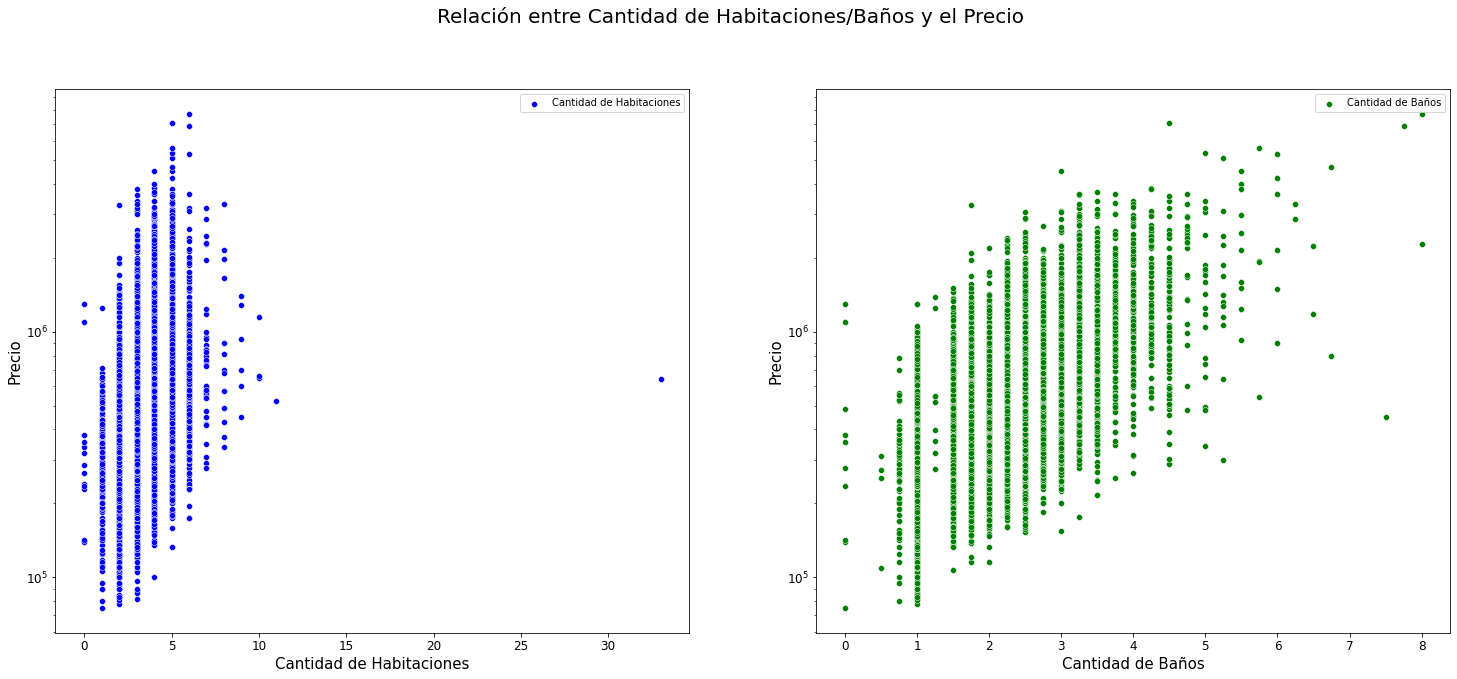

In [18]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
# Relación entre el número de Habitaciones/ Baños y el precio
plt.suptitle('Relación entre Cantidad de Habitaciones/Baños y el Precio', ha='center', va='center', size=20)
splot1=  sns.scatterplot(x='bedrooms', y='price', data=df, ax=ax[0], color="blue", label="Cantidad de Habitaciones")
splot1.set(yscale="log")
ax[0].set_xlabel('Cantidad de Habitaciones', size=15)
ax[0].set_ylabel('Precio', size=15)
splot2 = sns.scatterplot(x='bathrooms', y='price', data=df, ax=ax[1], color="green", label="Cantidad de Baños")
splot2.set(yscale="log")
ax[1].set_xlabel('Cantidad de Baños', size=15)
ax[1].set_ylabel('Precio', size=15)
plt.legend()


In [19]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

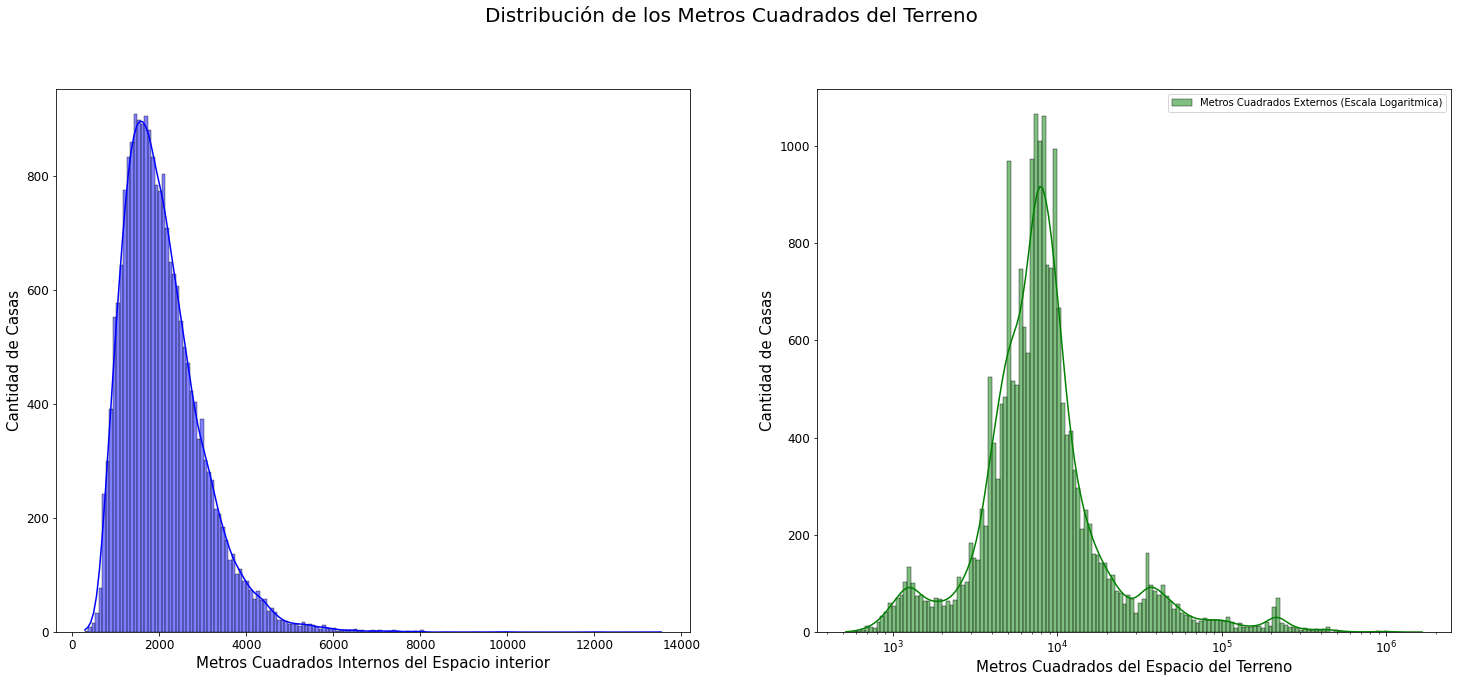

In [20]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
plt.suptitle('Distribución de los Metros Cuadrados del Terreno', ha='center', va='center', size=20)
sns.histplot(x='sqft_living', data=df, ax=ax[0], color="blue", label="Metros Cuadrados Internos", kde=True)
ax[0].set_xlabel('Metros Cuadrados Internos del Espacio interior', size=15)
ax[0].set_ylabel('Cantidad de Casas', size=15)
sns.histplot(df['sqft_lot'], ax=ax[1], color="green", label="Metros Cuadrados Externos (Escala Logaritmica)",kde= True, log_scale=True)
ax[1].set_xlabel('Metros Cuadrados del Espacio del Terreno', size=15)
ax[1].set_ylabel('Cantidad de Casas', size=15)
plt.legend()

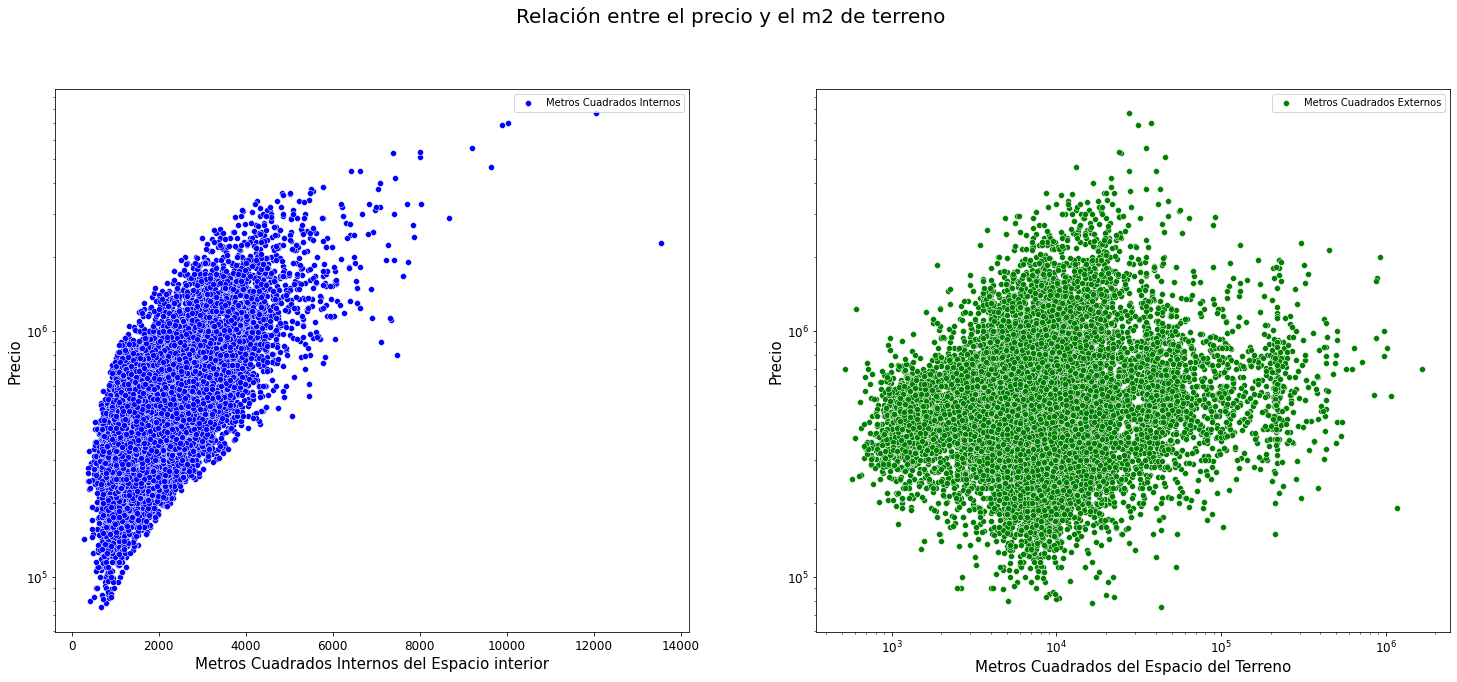

In [21]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
# Relación entre el precio y el m2 de terreno
plt.suptitle('Relación entre el precio y el m2 de terreno', ha='center', va='center', size=20)
splot1 = sns.scatterplot(x='sqft_living', y='price', data=df, ax=ax[0], color="blue", label="Metros Cuadrados Internos")
splot1.set(yscale="log")
ax[0].set_xlabel('Metros Cuadrados Internos del Espacio interior', size=15)
ax[0].set_ylabel('Precio', size=15)
splot2 = sns.scatterplot(x='sqft_lot', y='price', data=df, ax=ax[1], color="green", label="Metros Cuadrados Externos")
splot2.set(yscale="log", xscale="log")
ax[1].set_xlabel('Metros Cuadrados del Espacio del Terreno', size=15)
ax[1].set_ylabel('Precio', size=15)
plt.legend()

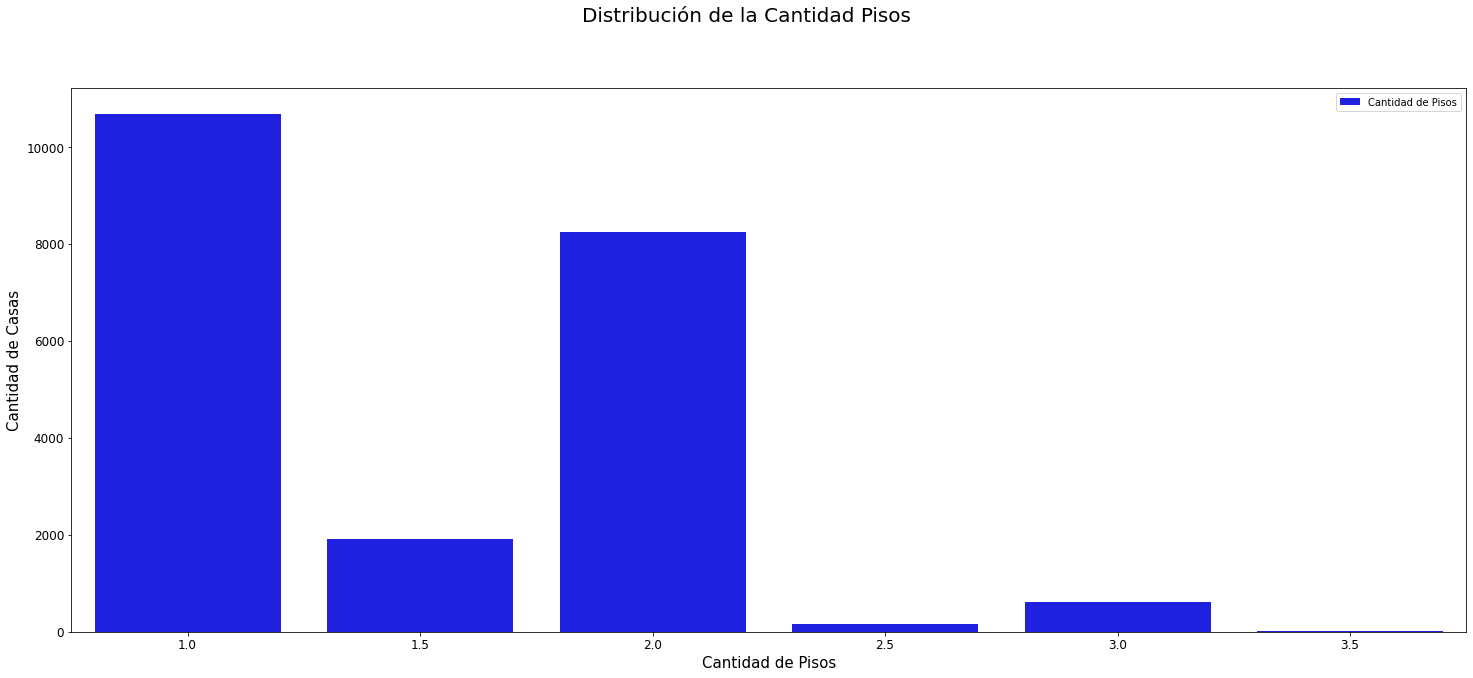

In [22]:
fig, ax = plt.subplots(1,1,figsize=(25,10))
plt.suptitle('Distribución de la Cantidad Pisos', ha='center', va='center', size=20)
sns.countplot(x='floors', data=df, ax=ax, color="blue", label="Cantidad de Pisos")
ax.set_xlabel('Cantidad de Pisos', size=15)
ax.set_ylabel('Cantidad de Casas', size=15)
plt.legend()

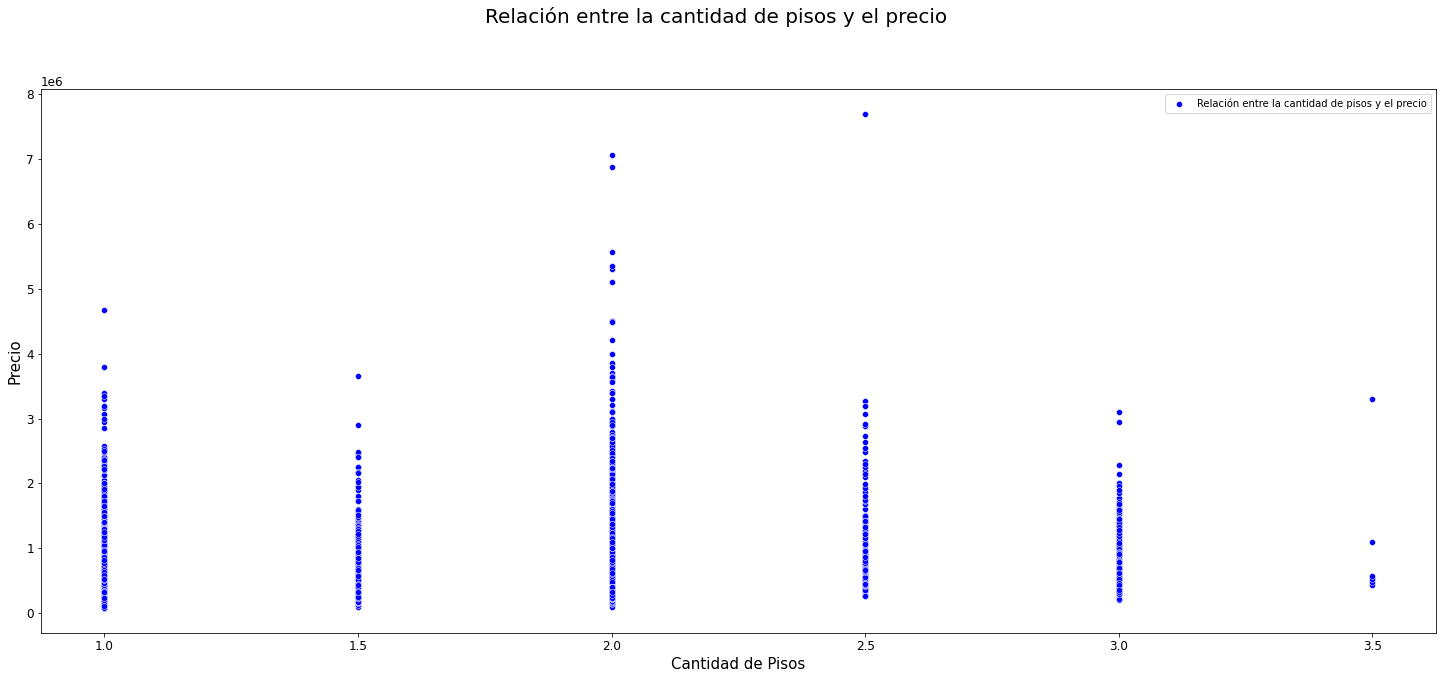

In [23]:
fig, ax = plt.subplots(1,1,figsize=(25,10))
# Relación entre la cantidad de pisos y el precio
plt.suptitle('Relación entre la cantidad de pisos y el precio', ha='center', va='center', size=20)
sns.scatterplot(x='floors', y='price', data=df, ax=ax, color="blue", label="Relación entre la cantidad de pisos y el precio")
ax.set_xlabel('Cantidad de Pisos', size=15)
ax.set_ylabel('Precio', size=15)
plt.legend()

In [24]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Se puede apreciar que existe el valor 0.5, esto podría darse a entender que existen casas con áticos

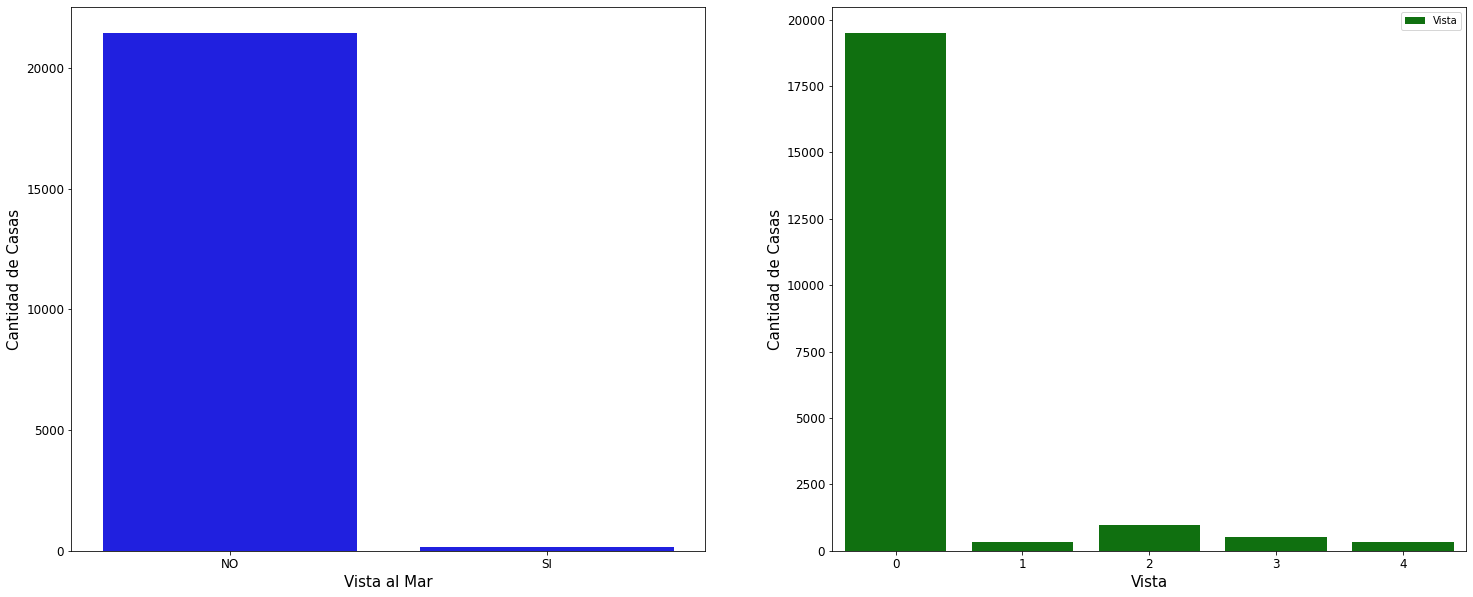

In [25]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
df_copy = df.copy()
df_copy.waterfront = df_copy.waterfront.apply(lambda x: 'SI' if x == 1 else 'NO')
sns.countplot(x='waterfront', data=df_copy, ax=ax[0], color="blue", label="Vista al Mar")
ax[0].set_xlabel('Vista al Mar', size=15)
ax[0].set_ylabel('Cantidad de Casas', size=15)
sns.countplot(x='view', data=df_copy, ax=ax[1], color="green", label="Vista")
ax[1].set_xlabel('Vista', size=15)
ax[1].set_ylabel('Cantidad de Casas', size=15)
plt.legend()


In [26]:
# porcentaje de casas con vista al mar
print(f"El Porcentaje de casas con vista al mar es {(df_copy.waterfront.value_counts()[1] / len(df_copy))  * 100} %")

El Porcentaje de casas con vista al mar es 0.7541757275713691 %


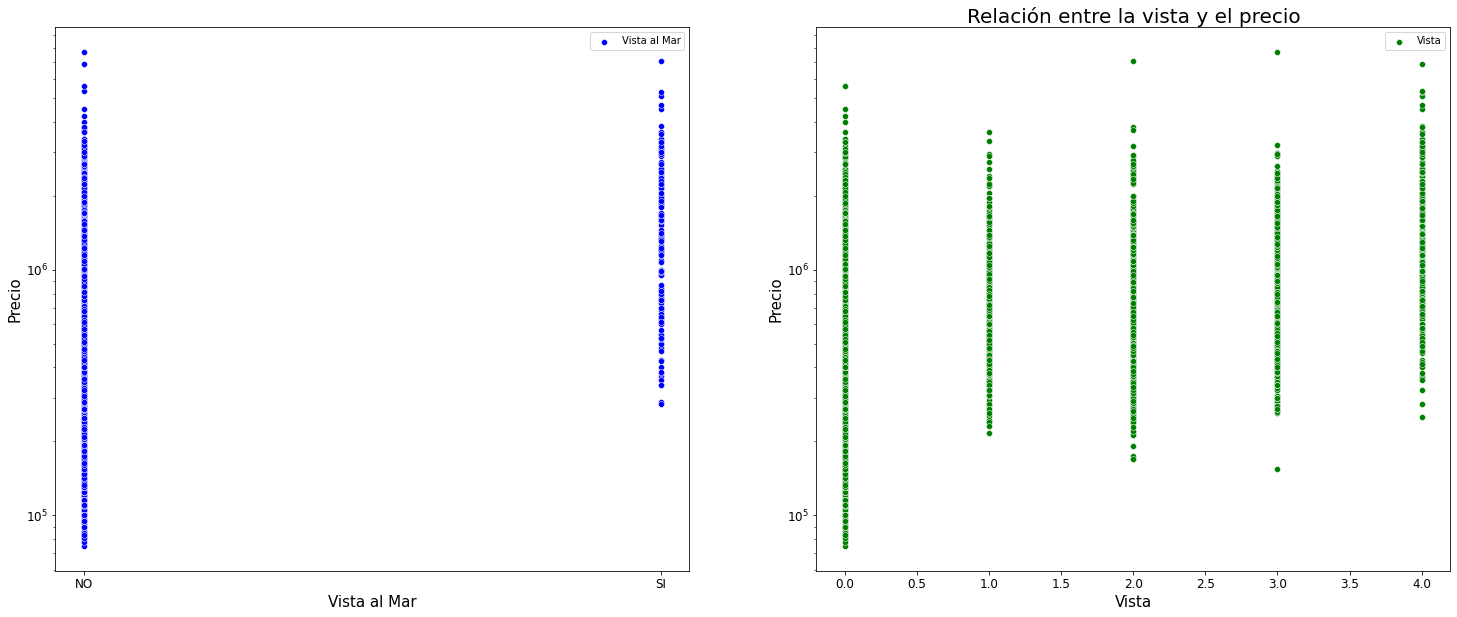

In [27]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
# Relación entre la vista y el precio
plt.title('Relación entre la vista y el precio', ha='center', va='center', size=20)
splot1 = sns.scatterplot(x='waterfront', y='price', data=df_copy, ax=ax[0], color="blue", label="Vista al Mar")
splot1.set(yscale="log")
ax[0].set_xlabel('Vista al Mar', size=15)
ax[0].set_ylabel('Precio', size=15)
splot2 = sns.scatterplot(x='view', y='price', data=df_copy, ax=ax[1], color="green", label="Vista")
splot2.set(yscale="log")
ax[1].set_xlabel('Vista', size=15)
ax[1].set_ylabel('Precio', size=15)
plt.legend()

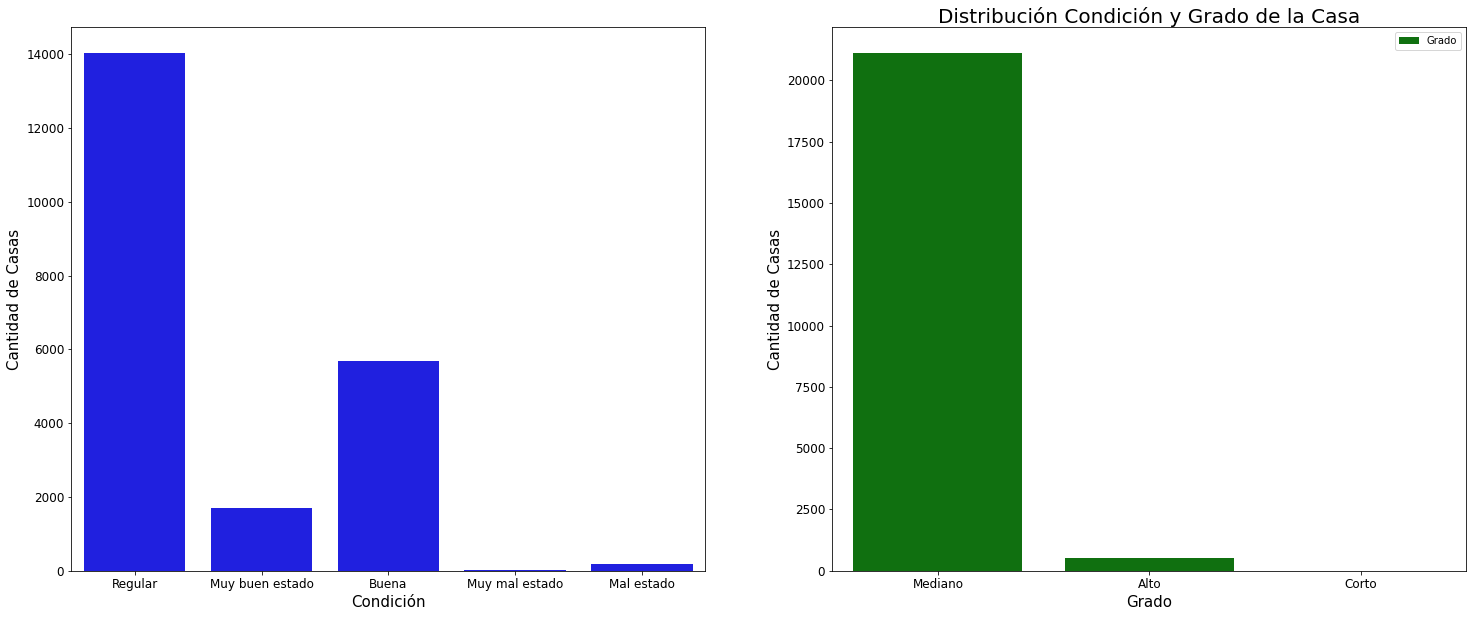

In [28]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
df_copy = df.copy()
choices_condition = {
    1: 'Muy mal estado',
    2: 'Mal estado',
    3: 'Regular',
    4: 'Buena',
    5: 'Muy buen estado'
}
df_copy['condition'] = df_copy['condition'].apply(lambda x: choices_condition[x])

grade = lambda x: 'Corto' if x >= 1 and x <=3 else 'Mediano' if x > 3 and x < 11 else 'Alto'
df_copy['grade'] = df_copy['grade'].apply(lambda x: grade(x))

plt.title('Distribución Condición y Grado de la Casa', ha='center', va='center', size=20)
sns.countplot(x='condition', data=df_copy, ax=ax[0], color="blue", label="Condición")
ax[0].set_xlabel('Condición', size=15)
ax[0].set_ylabel('Cantidad de Casas', size=15)
sns.countplot(x='grade', data=df_copy, ax=ax[1], color="green", label="Grado")
ax[1].set_xlabel('Grado', size=15)
ax[1].set_ylabel('Cantidad de Casas', size=15)
plt.legend()



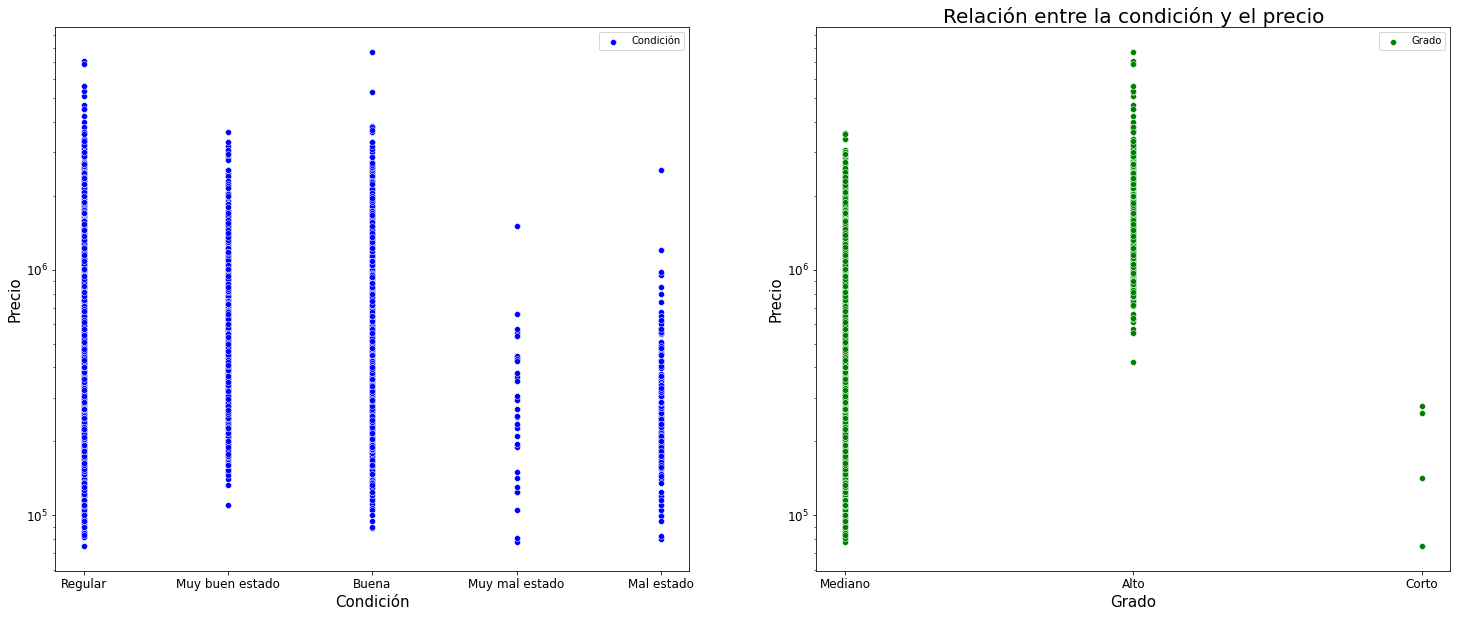

In [29]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
# Relación entre la condición y el precio
plt.title('Relación entre la condición y el precio', ha='center', va='center', size=20)
splot1 = sns.scatterplot(x='condition', y='price', data=df_copy, ax=ax[0], color="blue", label="Condición")
splot1.set(yscale="log")
ax[0].set_xlabel('Condición', size=15)
ax[0].set_ylabel('Precio', size=15)
splot2 = sns.scatterplot(x='grade', y='price', data=df_copy, ax=ax[1], color="green", label="Grado")
splot2.set(yscale="log")
ax[1].set_xlabel('Grado', size=15)
ax[1].set_ylabel('Precio', size=15)
plt.legend()

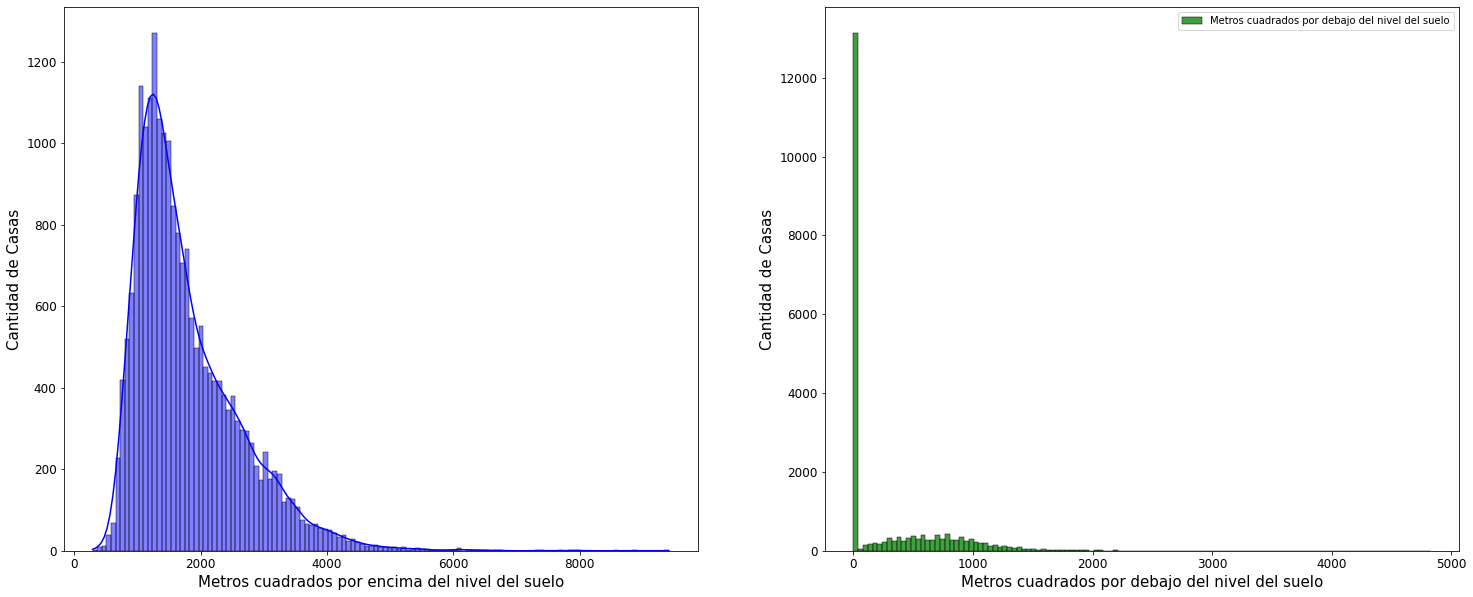

In [30]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
# Metros cuadrados por encima/ debajo del nivel del suelo
sns.histplot(x='sqft_above', data=df, ax=ax[0], color="blue", label="Metros cuadrados por encima del nivel del suelo",kde=True)
ax[0].set_xlabel('Metros cuadrados por encima del nivel del suelo', size=15)
ax[0].set_ylabel('Cantidad de Casas', size=15)
sns.histplot(x='sqft_basement', data=df, ax=ax[1], color="green", label="Metros cuadrados por debajo del nivel del suelo")
ax[1].set_xlabel('Metros cuadrados por debajo del nivel del suelo', size=15)
ax[1].set_ylabel('Cantidad de Casas', size=15)
plt.legend()


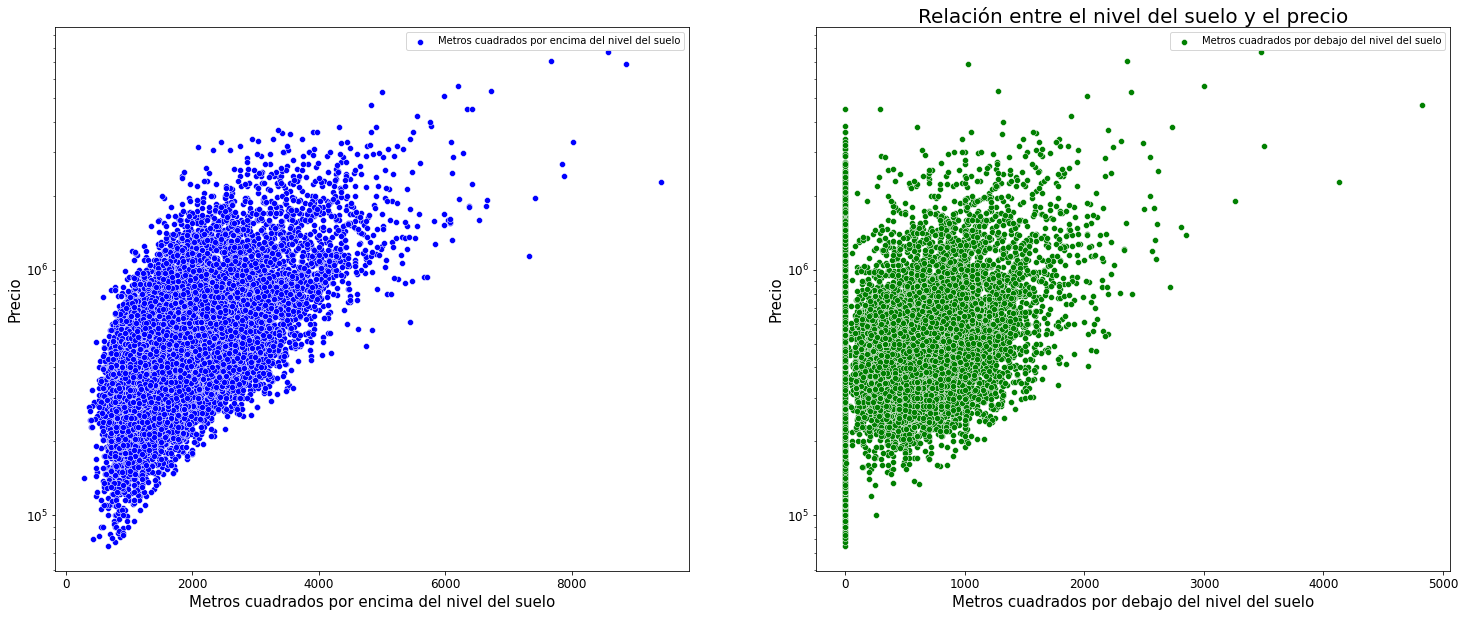

In [31]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
# Relación entre el nivel del suelo y el precio
plt.title('Relación entre el nivel del suelo y el precio', ha='center', va='center', size=20)
splot1 = sns.scatterplot(x='sqft_above', y='price', data=df, ax=ax[0], color="blue", label="Metros cuadrados por encima del nivel del suelo")
splot1.set(yscale="log")
ax[0].set_xlabel('Metros cuadrados por encima del nivel del suelo', size=15)
ax[0].set_ylabel('Precio', size=15)
splot2 = sns.scatterplot(x='sqft_basement', y='price', data=df, ax=ax[1], color="green", label="Metros cuadrados por debajo del nivel del suelo")
splot2.set(yscale="log")
ax[1].set_xlabel('Metros cuadrados por debajo del nivel del suelo', size=15)
ax[1].set_ylabel('Precio', size=15)
plt.legend()

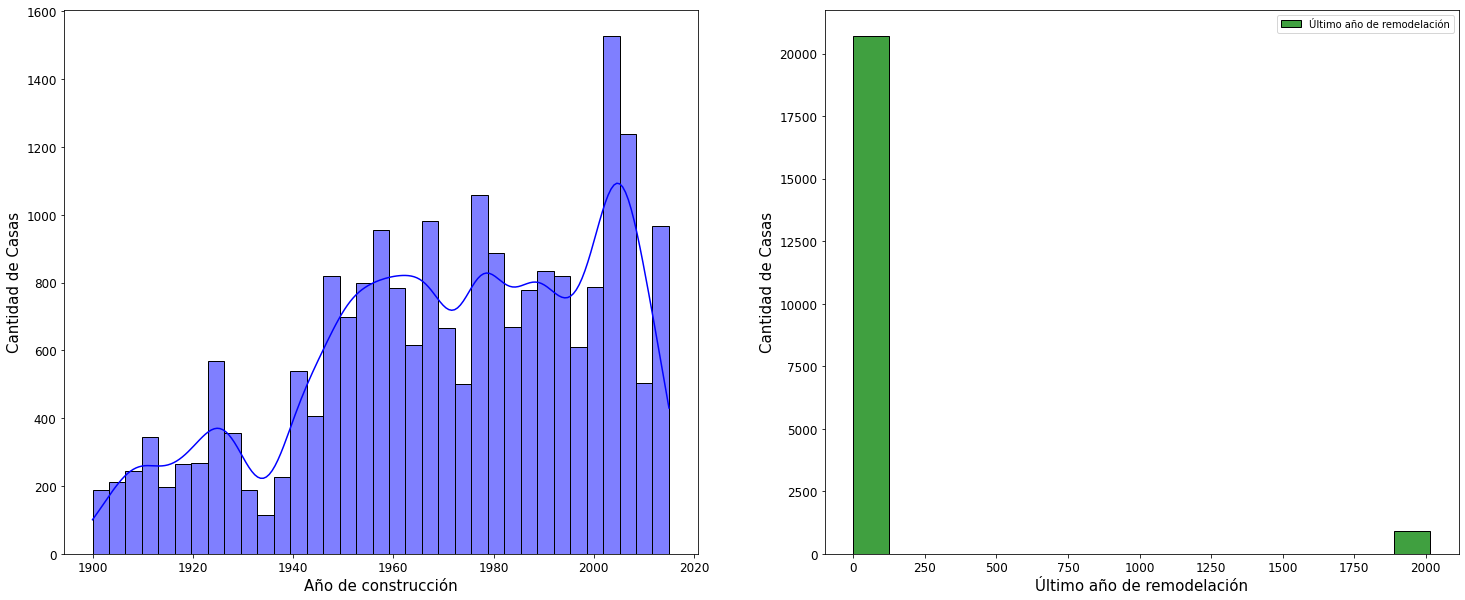

In [32]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
# Año de construcción y último año de remodelación
sns.histplot(x='yr_built', data=df, ax=ax[0], color="blue", label="Año de construcción",kde=True)
ax[0].set_xlabel('Año de construcción', size=15)
ax[0].set_ylabel('Cantidad de Casas', size=15)
sns.histplot(x='yr_renovated', data=df, ax=ax[1], color="green", label="Último año de remodelación")
ax[1].set_xlabel('Último año de remodelación', size=15)
ax[1].set_ylabel('Cantidad de Casas', size=15)
plt.legend()

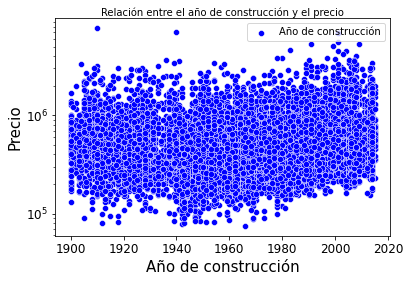

In [33]:
fig= plt.plot(figsize=(25,25))
# Relación entre el año de construcción y el precio
plt.title('Relación entre el año de construcción y el precio', ha='center', va='center', size=10)
splot1 = sns.scatterplot(x='yr_built', y='price', data=df, color="blue", label="Año de construcción")
splot1.set(yscale="log")
plt.xlabel('Año de construcción', size=15)
plt.ylabel('Precio', size=15)
plt.legend()

<AxesSubplot:title={'center':'Mapeo latitud y longitud'}, xlabel='long', ylabel='lat'>

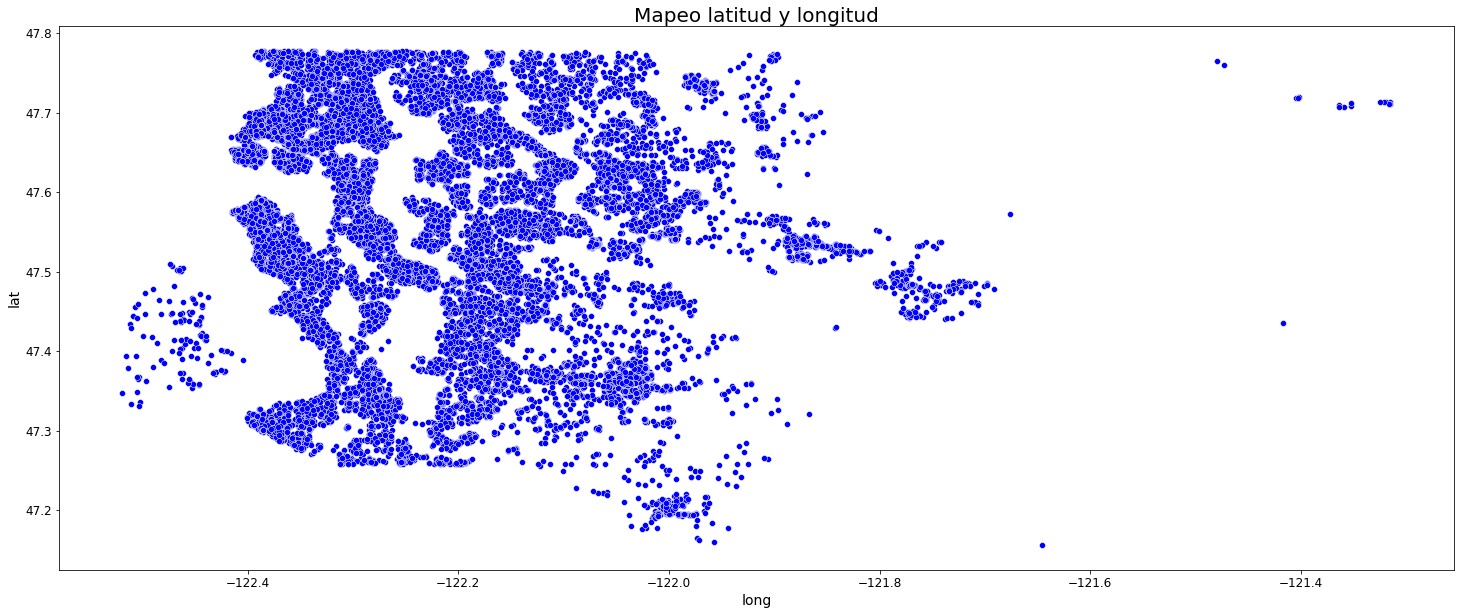

In [34]:
fig= plt.subplots(figsize=(25,10))
# Mapeo latitud y longitud
plt.title('Mapeo latitud y longitud', ha='center', va='center', size=20)
sns.scatterplot(x='long', y='lat', data=df, color="blue")

<AxesSubplot:xlabel='long', ylabel='lat'>

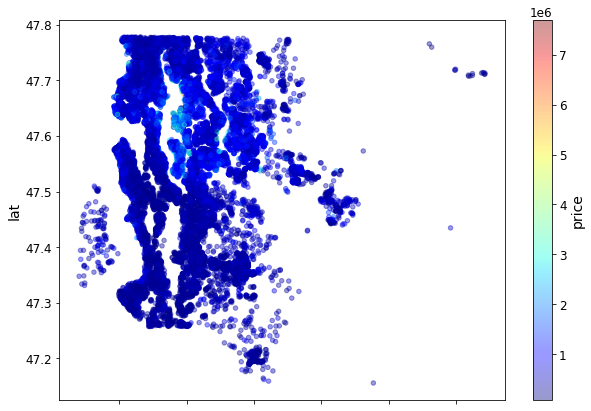

In [35]:
# precio en función de la ubicación
df.plot(kind="scatter", x="long", y="lat", figsize=(10,7),
                  c="price", cmap=plt.get_cmap("jet"),
                  colorbar=True, alpha=0.4)

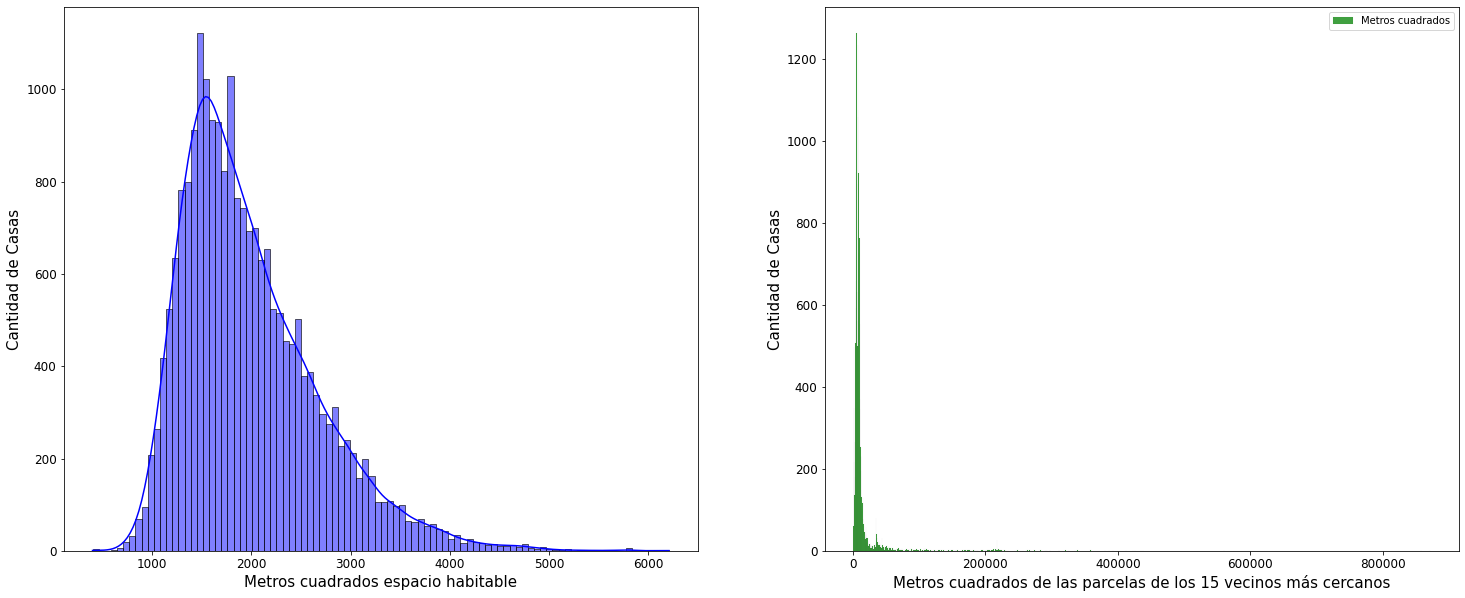

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
# m2 espacio habitable
sns.histplot(
    x='sqft_living15', data=df, ax=ax[0],
    color="blue", label="Metros cuadrados espacio habitable", kde=True)
ax[0].set_xlabel('Metros cuadrados espacio habitable', size=15)
ax[0].set_ylabel('Cantidad de Casas', size=15)
sns.histplot(
    x='sqft_lot15', data=df, ax=ax[1],
    color="green", label="Metros cuadrados")
ax[1].set_xlabel(
    'Metros cuadrados de las parcelas de los 15 vecinos más cercanos', size=15)
ax[1].set_ylabel('Cantidad de Casas', size=15)
plt.legend()


[None]

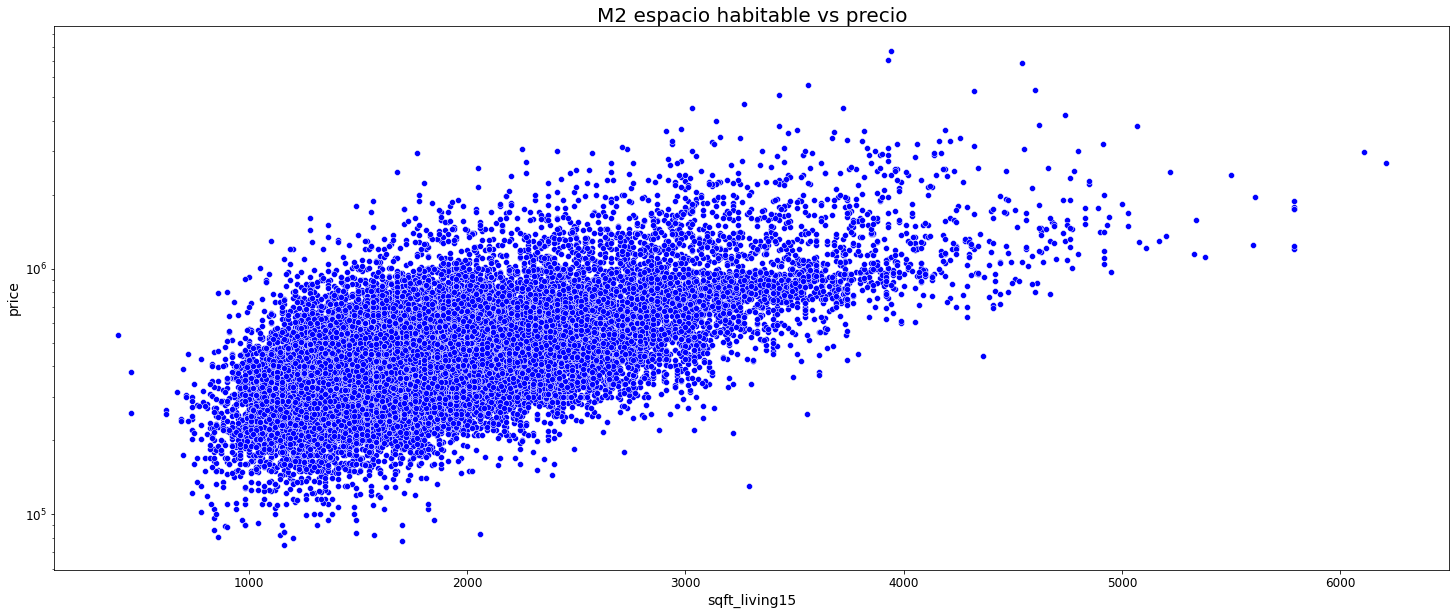

In [37]:
# m2 espacio habitable vs precio
fig= plt.subplots(figsize=(25, 10))
plt.title('M2 espacio habitable vs precio', ha='center', va='center', size=20)
splot1 = sns.scatterplot(x='sqft_living15', y='price', data=df, color="blue")
splot1.set(yscale="log")

Text(0.5, 0, 'Precio')

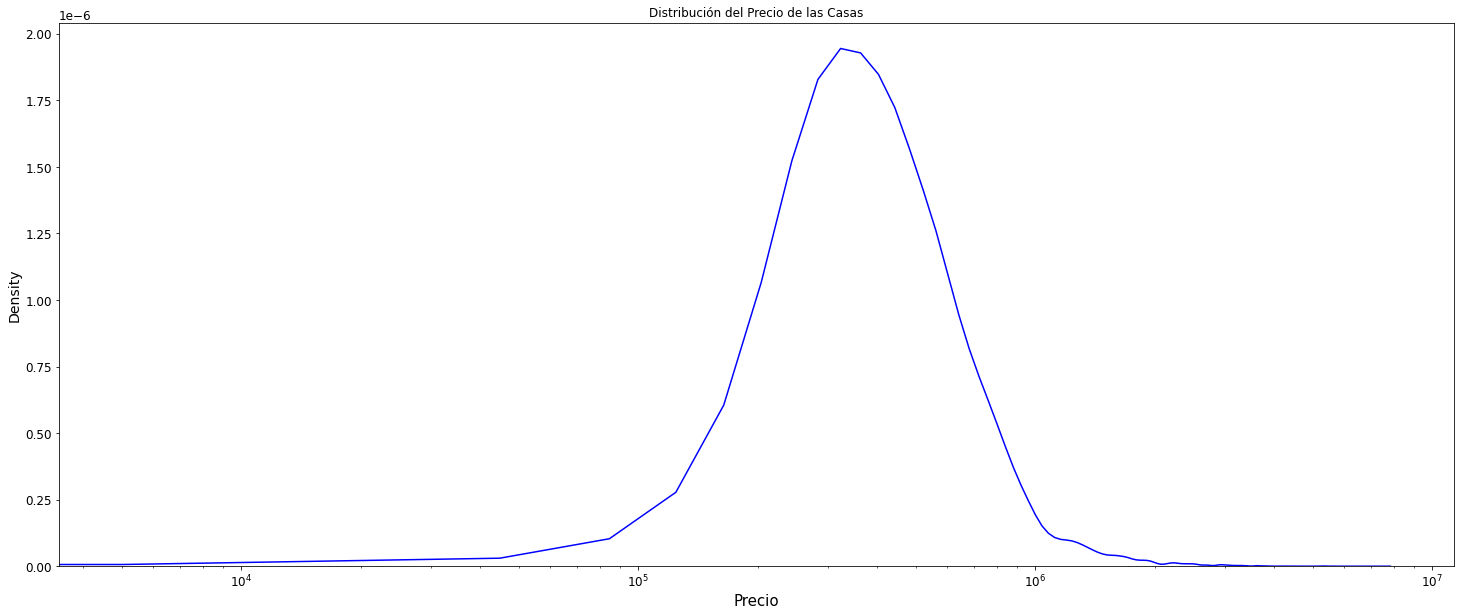

In [38]:
fig = plt.subplots(figsize=(25, 10))
plt.title('Distribución del Precio de las Casas')
splot1 = sns.distplot(df['price'], hist=False, color="blue")
splot1.set(xscale="log")

plt.xlabel('Precio', size=15)

### Mapa de Calor de Correlación (Heat Map)

<AxesSubplot:>

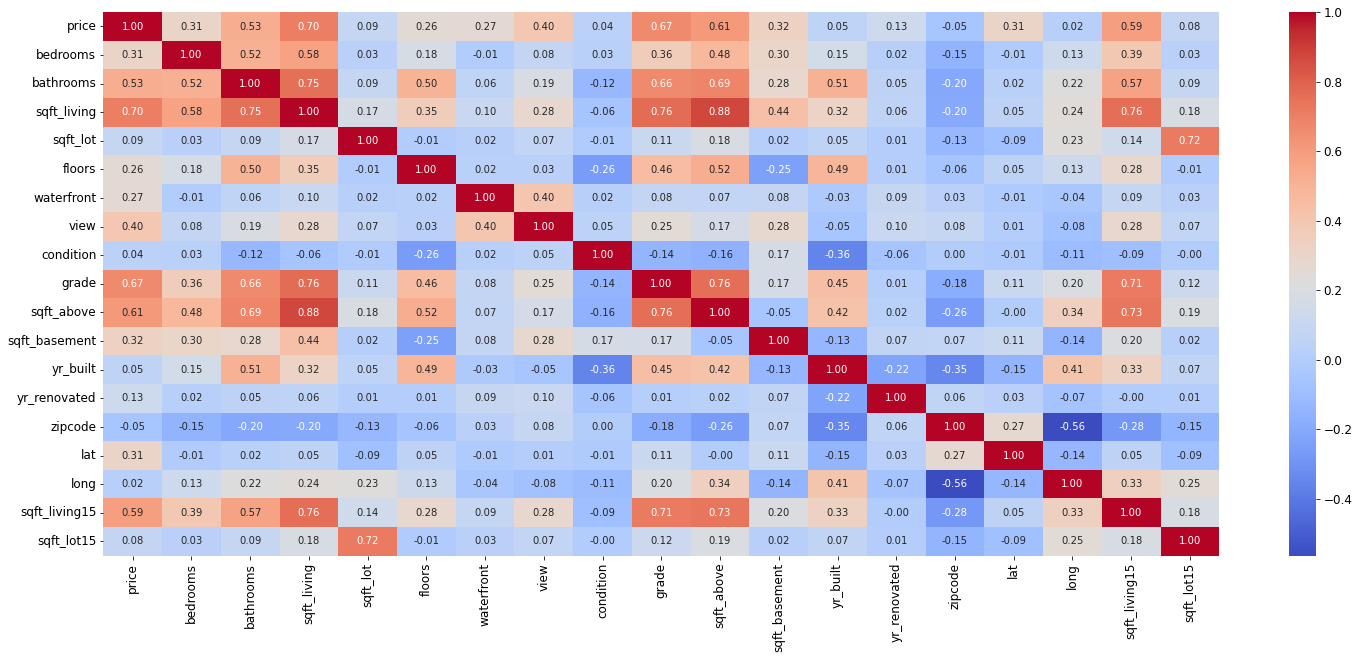

In [39]:
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

Se puede apreciar que existe correlaciones entre el precio de venta y ciertos datos, como `sqft_living`, `grade`, `sqft_living_15`, entre otros. Además, se puede notar que algunos datos tienen correlaciones con otros, como es el caso de `sqft_above` y `sqft_living`. Estas correlaciones son importante para el análisis de datos.

### Adecuación de los Datos

A partir de las correlaciones se van a crear mas columnas (feature engineering) con el fin de saber si estos nuevos features pueden ser utilizados para el análisis de datos.

In [40]:

# cantidad de baños por espacio habitable
df['bathrooms_per_sqft'] = df['bathrooms'] // df['sqft_living'] 

# relacion entre el los metros cuadrados por encima del nivel del suelo internos y los metros cuadrados internos
df['sqft_above_ratio'] = df['sqft_above'] / df['sqft_living']

# grado de la casa en función de la cantidad de cuartos
df['house_sqft_per_bedroom'] = df['bedrooms'] // df['sqft_living']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    21613 non-null  datetime64[ns]
 1   price                   21613 non-null  float64       
 2   bedrooms                21613 non-null  int64         
 3   bathrooms               21613 non-null  float64       
 4   sqft_living             21613 non-null  int64         
 5   sqft_lot                21613 non-null  int64         
 6   floors                  21613 non-null  float64       
 7   waterfront              21613 non-null  int64         
 8   view                    21613 non-null  int64         
 9   condition               21613 non-null  int64         
 10  grade                   21613 non-null  int64         
 11  sqft_above              21613 non-null  int64         
 12  sqft_basement           21613 non-null  int64 

In [41]:
# convirtiendo la columna de la fecha de compra en 3 columnas, día, mes y año
df['day'] = df['date'].apply(lambda x: x.day)
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)

# Cojunto X y Y
X = df.drop(['price','date'], axis=1)
y = df['price']

In [42]:
# distribución de los datos
X.shape, y.shape

((21613, 24), (21613,))

#### Determinación de la importacia de los Atributos (Feature Importance)

>Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable. [Terrence Shin](https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285#:~:text=Feature%20Importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable.)

Se seleccionaran los 10 features mas importantes, ademas de sus correlaciones para garantizar un mejor análisis de datos.

In [43]:
from sklearn.ensemble import RandomForestClassifier
# usamos un modelo de arbol de decisiones para obtener los atributos mas importantes
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

<AxesSubplot:>

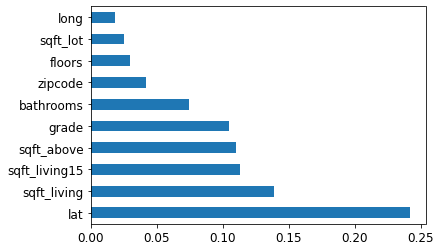

In [44]:
# obtener los nombres de los features más importantes
feature_names = [f"feature {i}" for i in range(X.shape[1])]

# graficar los 10 atributos mas importantes
(pd.Series(rf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

Se puede apreciar que la latitud es la característica más importante para predecir el precio de venta de las casas, seguido del grado de la casa y los metros cuadrados internos del terreno.

In [45]:
print(rf.feature_importances_)

[0.01608931 0.07471548 0.13886409 0.0249902  0.03008177 0.00112443
 0.01370286 0.         0.10488938 0.10967889 0.01483218 0.01094188
 0.00889864 0.04182971 0.24142078 0.01863257 0.11324077 0.01759368
 0.         0.01333501 0.         0.00308705 0.00078581 0.00126551]


Es importante lo siguiente, la correlación entre los features más importantes, podemos notar que `sqft_living` y `sqft_above` tienen una correlación de 0.88, esto podría darse a entender que los metros cuadrados del terreno y los metros cuadrados del espacio interior son muy importantes para el precio de venta de las casas.

Los datos a elegir para el análisis son:
- `lat`: Latitud
- `long`: Longitud
- `grade`: Grado de la casa (Condiciones)
- `sqft_living`: Metros cuadrados del espacio interior de la vivienda
- `sqft_above`: Los metros cuadrados del espacio interior de la vivienda que están por encima del nivel del suelo
- `sqft_living15`: Los metros cuadrados de espacio habitable de la vivienda para los 15 vecinos más cercanos
- `bathrooms`: Número de baños, donde 0,5 representa una habitación con aseo pero sin ducha
- `bedrooms`: Número de habitaciones
- `zipcode`: Código postal
- `view`: Vista de la casa
- `floors`: Número de plantas

In [46]:
X = df[['lat','long','grade','sqft_living','sqft_above','sqft_living15','bathrooms','bedrooms','zipcode','view','floors']]
y = df['price']

### Estratificación de los datos

Cojunto de entrenamiento y de prueba sin estratificación (solo para saber que tan desiguales son los datos)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
y_train.value_counts(normalize=True) * 100

350000.0     0.827068
450000.0     0.809717
325000.0     0.711394
425000.0     0.711394
550000.0     0.711394
               ...   
535900.0     0.005784
311850.0     0.005784
1910000.0    0.005784
2680000.0    0.005784
538888.0     0.005784
Name: price, Length: 3557, dtype: float64

In [49]:
y_test.value_counts(normalize=True) * 100

500000.0     0.925283
550000.0     0.832755
340000.0     0.786491
400000.0     0.763359
450000.0     0.740227
               ...   
208000.0     0.023132
352750.0     0.023132
672800.0     0.023132
2475000.0    0.023132
356500.0     0.023132
Name: price, Length: 1530, dtype: float64

El atributo `grade` es un valor numerico continuo, no obstance mencionan que según el rango de valores, se puede dividir en varias categorias, así que se puede hacer una estratificación por categorias.

<AxesSubplot:>

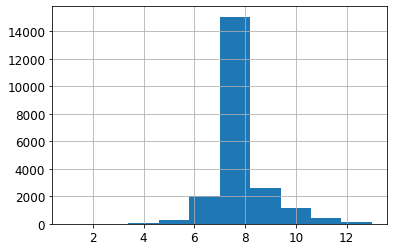

In [50]:
df["grade"].hist()

In [51]:
df["grade_cat"] = pd.cut(X["grade"],
                               bins=[0., 3.0, 7, 11, np.inf],
                               labels=[1, 2, 3, 4])

In [52]:
df["grade_cat"].value_counts()

2    11290
3    10216
4      103
1        4
Name: grade_cat, dtype: int64

<AxesSubplot:>

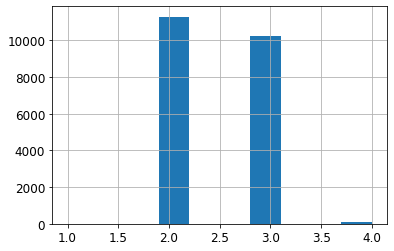

In [53]:
df["grade_cat"].hist()

In [54]:
# estratificación basado en la categoría del grado
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["grade_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [55]:
# Se definen los nuevos conjuntos de entrennamiento y prueba
X_train = strat_train_set[['lat','long','grade_cat','sqft_living','sqft_above','sqft_living15','bathrooms','zipcode','bedrooms','view','floors']]
X_test = strat_test_set[['lat','long','grade_cat','sqft_living','sqft_above','sqft_living15','bathrooms','zipcode','bedrooms','view','floors']]
y_train = strat_train_set['price']
y_test = strat_test_set['price']


#### Normalización de Datos
> StandardScaler realiza la tarea de Estandarización. Por lo general, un conjunto de datos contiene variables que son diferentes en escala. Por ej. un conjunto de datos de empleados contendrá una columna AGE con valores en la escala 20-7 y una columna SALARY con valores en la escala 10000-800. Como estas dos columnas son diferentes en escala, están estandarizadas para tener una escala común al construir el modelo de aprendizaje automático. [Source](https://www.web-dev-qa-db-es.com/es/python/alguien-puede-explicarme-standardscaler/829529418/#:~:text=StandardScaler%20realiza%20la%20tarea%20de,en%20la%20escala%2010000%2D800.)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Se aplica la escala a los conjuntos de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17290, 11), (17290,), (4323, 11), (4323,))

## Entrenamiento de Módelos

Para este proyecto se utilizará el modelo de aprendizaje automático de Scikit-learn. Como es un problema de regresión, se utilizarán modelos de regresión lineal.
Para saber que tan precisos son los modelos, se utilizará el método de validación cruzada. El error de validación cruzada es una métrica que nos permite saber cuál es el error de predicción de nuestro modelo. Entre menor sea el error de predicción, mejor es el modelo.

1. Regresión Lineal
2. Regresión Polinomial
3. Gradiente Descendente Estocástico (Gradient Boosting)
4. Random Forest

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.model_selection import (cross_val_score, GridSearchCV)


#### Validación Cruzada
Datos obtenidos a partir de la validación cruzada
- `Scores`: Matriz de puntuaciones del estimador para cada ejecución de la validación cruzada.
- `Mean Scores`: Media de las puntuaciones del estimador para cada ejecución de la validación cruzada. (Con esto se puede saber la precisión del modelo)
- `Mean Absolute Error`: Media de la diferencia absoluta entre el valor real y el valor estimado.
- `Mean Squared Error`: Media de la diferencia cuadrática entre el valor real y el valor estimado.
- `Root Mean Squared Error`: Raíz de la media de la diferencia cuadrática entre el valor real y el valor estimado.
- `R2 Score`: Puntuación de la calidad del modelo.
- `Standard Deviation`: Desviación estándar de los datos.
- `Intercept`: Valor de la pendiente de la recta.


In [59]:
def display_scores(model,scores, y_test, y_pred):
    print("Scores:", scores)
    print("Mean Scores:", scores.mean())
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Standar Deviation:", scores.std())
    try:
        print("Intercept", model.intercept_)
    except:
        pass

### Regresión Lineal
> El análisis de la regresión lineal se utiliza para predecir el valor de una variable según el valor de otra. La variable que desea predecir se denomina variable dependiente. La variable que está utilizando para predecir el valor de la otra variable se denomina variable independiente. [IBM](https://www.ibm.com/mx-es/analytics/learn/linear-regression)

In [60]:
# Se define el modelo de regresión lineal y se entrena
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [61]:
# Predicción
y_lr_pred = lr.predict(X_test)

In [62]:
# Se calculan los scores mediante la validación cruzada
lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
display_scores(lr,lr_scores, y_test, y_lr_pred)

Scores: [0.62129276 0.60377683 0.64624227 0.64464635 0.6392469  0.64475512
 0.65858428 0.63590592 0.64294528 0.63149845]
Mean Scores: 0.6368894162589313
Mean Absolute Error: 140164.55143234952
Mean Squared Error: 47784613402.52283
Root Mean Squared Error: 218596.91992917657
R2 Score: 0.6278064307672508
Standar Deviation: 0.014464238877813715
Intercept 540821.0234817693


La implementación de la regresión lineal genera un modelo con un error de $140165 con respecto al precio de la casa. 

### Regresión Polinomial
> La Regresión Polinomial es un caso especial de la Regresión Lineal, extiende el modelo lineal al agregar predictores adicionales, obtenidos al elevar cada uno de los predictores originales a una potencia. Por ejemplo, una regresión cúbica utiliza tres variables, como predictores. Este enfoque proporciona una forma sencilla de proporcionar un ajuste no lineal a los datos. [AprendeIA](https://aprendeia.com/algoritmo-regresion-polinomial-machine-learning/)

#### Polinomio de 2do Grado

In [63]:
# se eleva el grado del polinomio
poly_second_grade = PolynomialFeatures(degree=2)
X_train_poly_sg = poly_second_grade.fit_transform(X_train)
X_test_poly_sg = poly_second_grade.fit_transform(X_test)

# Se define el modelo de regresión lineal con el conjunto de entranamiento polinomial y se entrena
poly_second_grade_lr = LinearRegression()
poly_second_grade_lr.fit(X_train_poly_sg, y_train)


LinearRegression()

In [64]:
y_poly_sg_pred = poly_second_grade_lr.predict(X_test_poly_sg)

In [65]:
# Se calculan los scores mediante la validación cruzada
poly_sg_scores = cross_val_score(poly_second_grade_lr, X_train_poly_sg, y_train, cv=10)
display_scores(poly_second_grade_lr,poly_sg_scores, y_test, y_poly_sg_pred)

Scores: [0.75884215 0.67432811 0.77774139 0.76331918 0.72920039 0.76467418
 0.75648492 0.75732113 0.73228255 0.78390365]
Mean Scores: 0.7498097649554429
Mean Absolute Error: 117065.53198799868
Mean Squared Error: 37903407922.4256
Root Mean Squared Error: 194687.97580340086
R2 Score: 0.7047709780155378
Standar Deviation: 0.02992994491127832
Intercept 543932.7378536382


La implementación de la regresión polinomial de 2do grado genera un modelo con un error de $117066 con respecto al precio de la casa. 

#### Regresion Polinomial de grado 3

In [66]:
# Usar polinomios de grado 3
poly_third_grade = PolynomialFeatures(degree=3)
X_train_poly_tg = poly_third_grade.fit_transform(X_train)
X_test_poly_tg = poly_third_grade.fit_transform(X_test)

poly_third_grade_lr = LinearRegression()
poly_third_grade_lr.fit(X_train_poly_tg, y_train)


LinearRegression()

In [67]:
y_poly_tg_pred = poly_third_grade_lr.predict(X_test_poly_tg)

In [68]:
poly_tg_scores = cross_val_score(poly_third_grade_lr, X_train_poly_tg, y_train, cv=10)
display_scores(poly_third_grade_lr,poly_tg_scores, y_test, y_poly_tg_pred)

Scores: [ 0.83293107  0.73667396  0.84118563  0.80841553  0.80078192  0.81756456
  0.80723073  0.81611942  0.76124056 -5.01152165]
Mean Scores: 0.22106217249500243
Mean Absolute Error: 97966.53522249483
Mean Squared Error: 30203342952.009056
Root Mean Squared Error: 173791.0899672623
R2 Score: 0.7647466576453343
Standar Deviation: 1.7444506042644286
Intercept 619330.2916422603


La implementación de la regresión polinomial de 3er grado genera un modelo con un error de $97967 con respecto al precio de la casa. 

#### Regresión Polinomial de grado 4

In [69]:
# Usar polinomios de grado 4
poly_fourth_grade = PolynomialFeatures(degree=4)
X_train_poly_fg = poly_fourth_grade.fit_transform(X_train)
X_test_poly_fg = poly_fourth_grade.fit_transform(X_test)

poly_fourth_grade_lr = LinearRegression()
poly_fourth_grade_lr.fit(X_train_poly_fg, y_train)


LinearRegression()

In [70]:
y_poly_fg_pred = poly_fourth_grade_lr.predict(X_test_poly_fg)

In [71]:
poly_fg_scores = cross_val_score(poly_fourth_grade_lr, X_train_poly_fg, y_train, cv=10)
display_scores(poly_fourth_grade_lr,poly_fg_scores, y_test, y_poly_fg_pred)

Scores: [ 3.31671777e-01  6.29120537e-01  8.12162190e-01  4.80354897e-01
 -4.62517353e-01 -1.10893639e+14 -1.17947114e+13 -4.17385752e+00
 -1.49321761e+14 -4.42754114e+02]
Mean Scores: -27201011156180.324
Mean Absolute Error: 5420069114.249174
Mean Squared Error: 1.269924372925922e+23
Root Mean Squared Error: 356359982731.77673
R2 Score: -989142009024.8702
Standar Deviation: 52282456560839.5
Intercept 55155640466.864426


La implementación de la regresión polinomial de 3er grado genera un modelo con un error de $5420069114 con respecto al precio de la casa.

**El valor más óptimo de la Regresión Polinomial es 3.**

### Gradiente Descendente Estocástico (Gradient Boosting)
> En muchas de las técnicas de aprendizaje automático, el «aprendizaje» consiste en encontrar qué parámetros W minimizan la función de coste. Esto es así para la regresión lineal y polinómica, la regresión logística, el deep learning, etc. El gradiente descendiente es un método de optimización numérica para estimar  los mejores coeficientes. [IArtificial](https://www.iartificial.net/gradiente-descendiente-para-aprendizaje-automatico/)

In [72]:
# se define el modelo de gradient boosting
# con un número de estimadores 400
# tasa de aprendizaje 0.1
# profundidad maxima para cada estimador 3
gbr = GradientBoostingRegressor(
    n_estimators=400, learning_rate=0.1, max_depth=3, random_state=0,
    loss='squared_error')
gbr.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=400, random_state=0)

In [73]:
y_gbr_pred = gbr.predict(X_test)

In [74]:
# Se calculan los scores mediante la validación cruzada
gbr_scores = cross_val_score(gbr, X_train, y_train, cv=10)
display_scores(gbr,gbr_scores, y_test, y_gbr_pred)

Scores: [0.87114852 0.82919158 0.8750155  0.85440998 0.87189318 0.86175076
 0.85393871 0.85560368 0.83211424 0.88244718]
Mean Scores: 0.858751334407595
Mean Absolute Error: 78390.40569039316
Mean Squared Error: 21064039030.755913
Root Mean Squared Error: 145134.55491631175
R2 Score: 0.8359325458328168
Standar Deviation: 0.016723162168722848


se puede apreciar que el modelo de aprendizaje genera un error de $78390 con respecto al precio de la casa.

### Random Forest Regressor
> Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model. [Baski Chaya](https://levelup.gitconnected.com/random-forest-regression-209c0f354c84)

In [75]:
# se define el modelo de random forest
rf = RandomForestRegressor( n_estimators=400, max_depth=3, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=400, random_state=0)

In [76]:
y_rf_pred = rf.predict(X_test)

In [77]:
# se aplican los scores mediante la validación cruzada
rf_scores = cross_val_score(rf, X_train, y_train, cv=10)
display_scores(rf,rf_scores, y_test, y_rf_pred)

Scores: [0.64316775 0.59826619 0.60201364 0.63306866 0.61612359 0.63797397
 0.6082922  0.60469328 0.61894859 0.64307038]
Mean Scores: 0.6205618236745878
Mean Absolute Error: 135580.52341012863
Mean Squared Error: 50657277723.10452
Root Mean Squared Error: 225071.71684399736
R2 Score: 0.6054312955395498
Standar Deviation: 0.01656216080739211


se puede apreciar que el modelo de aprendizaje genera un error de $135580 con respecto al precio de la casa.

### Comparativa del Desempeño de los Modelos

Una vez que se han generado los modelos, se puede comparar el desempeño de los mismos, el parámetro para determinarlo es el error de predicción. Es por ello que con el metodo de validación cruzada, se puede obtener un error de predicción de los mismos. Luego se seleccionaran los dos modelos con menores errores para explorar sus hiperparámetros con el fin de obtener un mejor modelo.

In [96]:
error_dataset = pd.DataFrame(
    {
        'Regresión Lineal':{'Error': mean_absolute_error(y_test, y_lr_pred)},
        'Regresión Polinomial de Grado 2':{'Error': mean_absolute_error(y_test, y_poly_sg_pred)},
        'Regresión Polinomial de Grado 3':{'Error':mean_absolute_error(y_test, y_poly_tg_pred)},
        'Regresión Polinomial de Grado 4':{'Error': mean_absolute_error(y_test, y_poly_fg_pred)},
        'Gradiente Descendente Estocastico':{'Error': mean_absolute_error(y_test, y_gbr_pred)},
        'Random Forest': {'Error':mean_absolute_error(y_test, y_rf_pred)},
    }
).T

In [101]:
pd.options.display.float_format = '{:.5f}'.format
error_dataset

,Error
Regresión Lineal,140164.55143
Regresión Polinomial de Grado 2,117065.53199
Regresión Polinomial de Grado 3,97966.53522
Regresión Polinomial de Grado 4,5420069114.24917
Gradiente Descendente Estocastico,78390.40569
Random Forest,135580.52341


se elegiran los dos módelos más prometedores:

1. Gradiente Descendente Estocastico 
2. Regresión Polinomial de Grado 3

Y se aplicará un GridSearchCV para determinar cuales son los mejores hiperparámetros para dichos modelo, con el fin de seleccionar el mejor de los dos con los hiperparámetros más optimos.

### Gradiente Descendente Estocastico 

In [81]:
# Rango de parametros para el Gradient Boosting
n_estimators = [300, 400, 500]
learning_rate = [0.1, 0.2, 0.3]
max_depth = [2, 3, 4, 5]
loss = ['squared_error', 'quantile']

params = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth, 'loss': loss}

gs_gbr = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=params, cv=10,n_jobs=-1)

In [82]:
gs_gbr.fit(X_train, y_train)
gs_gbr.best_params_

{'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'n_estimators': 400}

Ahora que se han definido los mejores hiperparámetros, se procede a probar nuevamente el modelo

In [92]:
gbr_optimal = GradientBoostingRegressor(
    n_estimators=400, learning_rate=0.1, max_depth=5, random_state=0,
    loss='squared_error')


In [93]:
gbr_optimal.fit(X_train, y_train)

y_gbr_optimal_pred = gbr_optimal.predict(X_test)

In [94]:
gbr_optimal_scores = cross_val_score(gbr_optimal, X_train, y_train, cv=10)
display_scores(gbr_optimal,gbr_optimal_scores, y_test, y_gbr_optimal_pred)

Scores: [0.8763201  0.83531438 0.88090796 0.86432023 0.88384319 0.87119903
 0.87211991 0.87530189 0.82298986 0.87472798]
Mean Scores: 0.8657044538283254
Mean Absolute Error: 72470.49214043599
Mean Squared Error: 17443757217.75097
Root Mean Squared Error: 132074.8167432042
R2 Score: 0.8641308614341225
Standar Deviation: 0.019151355905471883


### Regresión Polinomial de Grado 3

In [86]:
# params for the linear regression
params = {'fit_intercept': [True, False], 'normalize': [True, False]}
gs_lr = GridSearchCV(estimator=LinearRegression(), param_grid=params, cv=10,n_jobs=-1)


In [87]:
gs_lr.fit(X_train_poly_tg, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [88]:
gs_lr.best_params_

{'fit_intercept': False, 'normalize': True}

una vez elegido los mejores hiperparámetros, se procede a probar nuevamente el modelo

In [89]:
lr_optimal = LinearRegression(fit_intercept=False, normalize=True)
lr_optimal.fit(X_train_poly_tg, y_train)

LinearRegression(fit_intercept=False, normalize=True)

In [90]:
y_lr_optimal_pred = lr_optimal.predict(X_test_poly_tg)

In [91]:
poly_tg_optimal_scores = cross_val_score(lr_optimal, X_train_poly_tg, y_train, cv=10)
display_scores(lr_optimal,poly_tg_optimal_scores, y_test, y_lr_optimal_pred)

Scores: [ 0.83293107  0.73667396  0.84118563  0.80841553  0.80078192  0.81756456
  0.80723073  0.81611942  0.76124056 -5.01152165]
Mean Scores: 0.22106217249509763
Mean Absolute Error: 97966.53522249553
Mean Squared Error: 30203342952.00815
Root Mean Squared Error: 173791.08996725967
R2 Score: 0.7647466576453414
Standar Deviation: 1.7444506042641441
Intercept 0.0


El modelo ganador es el modelo de Gradiente Descendente Estocástico. El modelo ganador tiene un error de $72215 con respecto al precio de la casa. Por supuesto es un error considerable, esto se podría mejorar implementando combinaciones de más hiperparámetros, modelos y la obtención de datos más relevantes.